In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score


In [9]:
# Load training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Preview data
print("Training Data Overview:")
print(train_df.head())
print("\nTest Data Overview:")
print(test_df.head())


Training Data Overview:
   response_id  age  gender  years_at_company    job_role  monthly_income  \
0         8410   31    Male                19   Education          5390.0   
1        64756   59  Female                 4       Media          5534.0   
2        30257   24  Female                10  Healthcare          8159.0   
3        65791   36  Female                 7   Education          3989.0   
4        65026   56    Male                41   Education          4821.0   

  work_life_balance job_satisfaction performance_rating  promotions_count  \
0         Excellent           Medium            Average                 2   
1              Poor             High                Low                 3   
2              Good             High                Low                 0   
3              Good             High               High                 1   
4               NaN              NaN            Average                 0   

   ... dependents_count  job_level company_size co

In [10]:
# Target variable and feature separation
target_col = 'exit_status'
X = train_df.drop(columns=[target_col, 'response_id'])
y = train_df[target_col].apply(lambda x: 1 if x == 'Left' else 0)  # Encode target: 'Left' -> 1, 'Stayed' -> 0

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



<ipython-input-11-f166d034a8d5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=col, palette='Set2')
<ipython-input-11-f166d034a8d5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=col, palette='Set2')
<ipython-input-11-f166d034a8d5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=col, palette='Set2')
<ipython-input-11-f166d034a8d5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

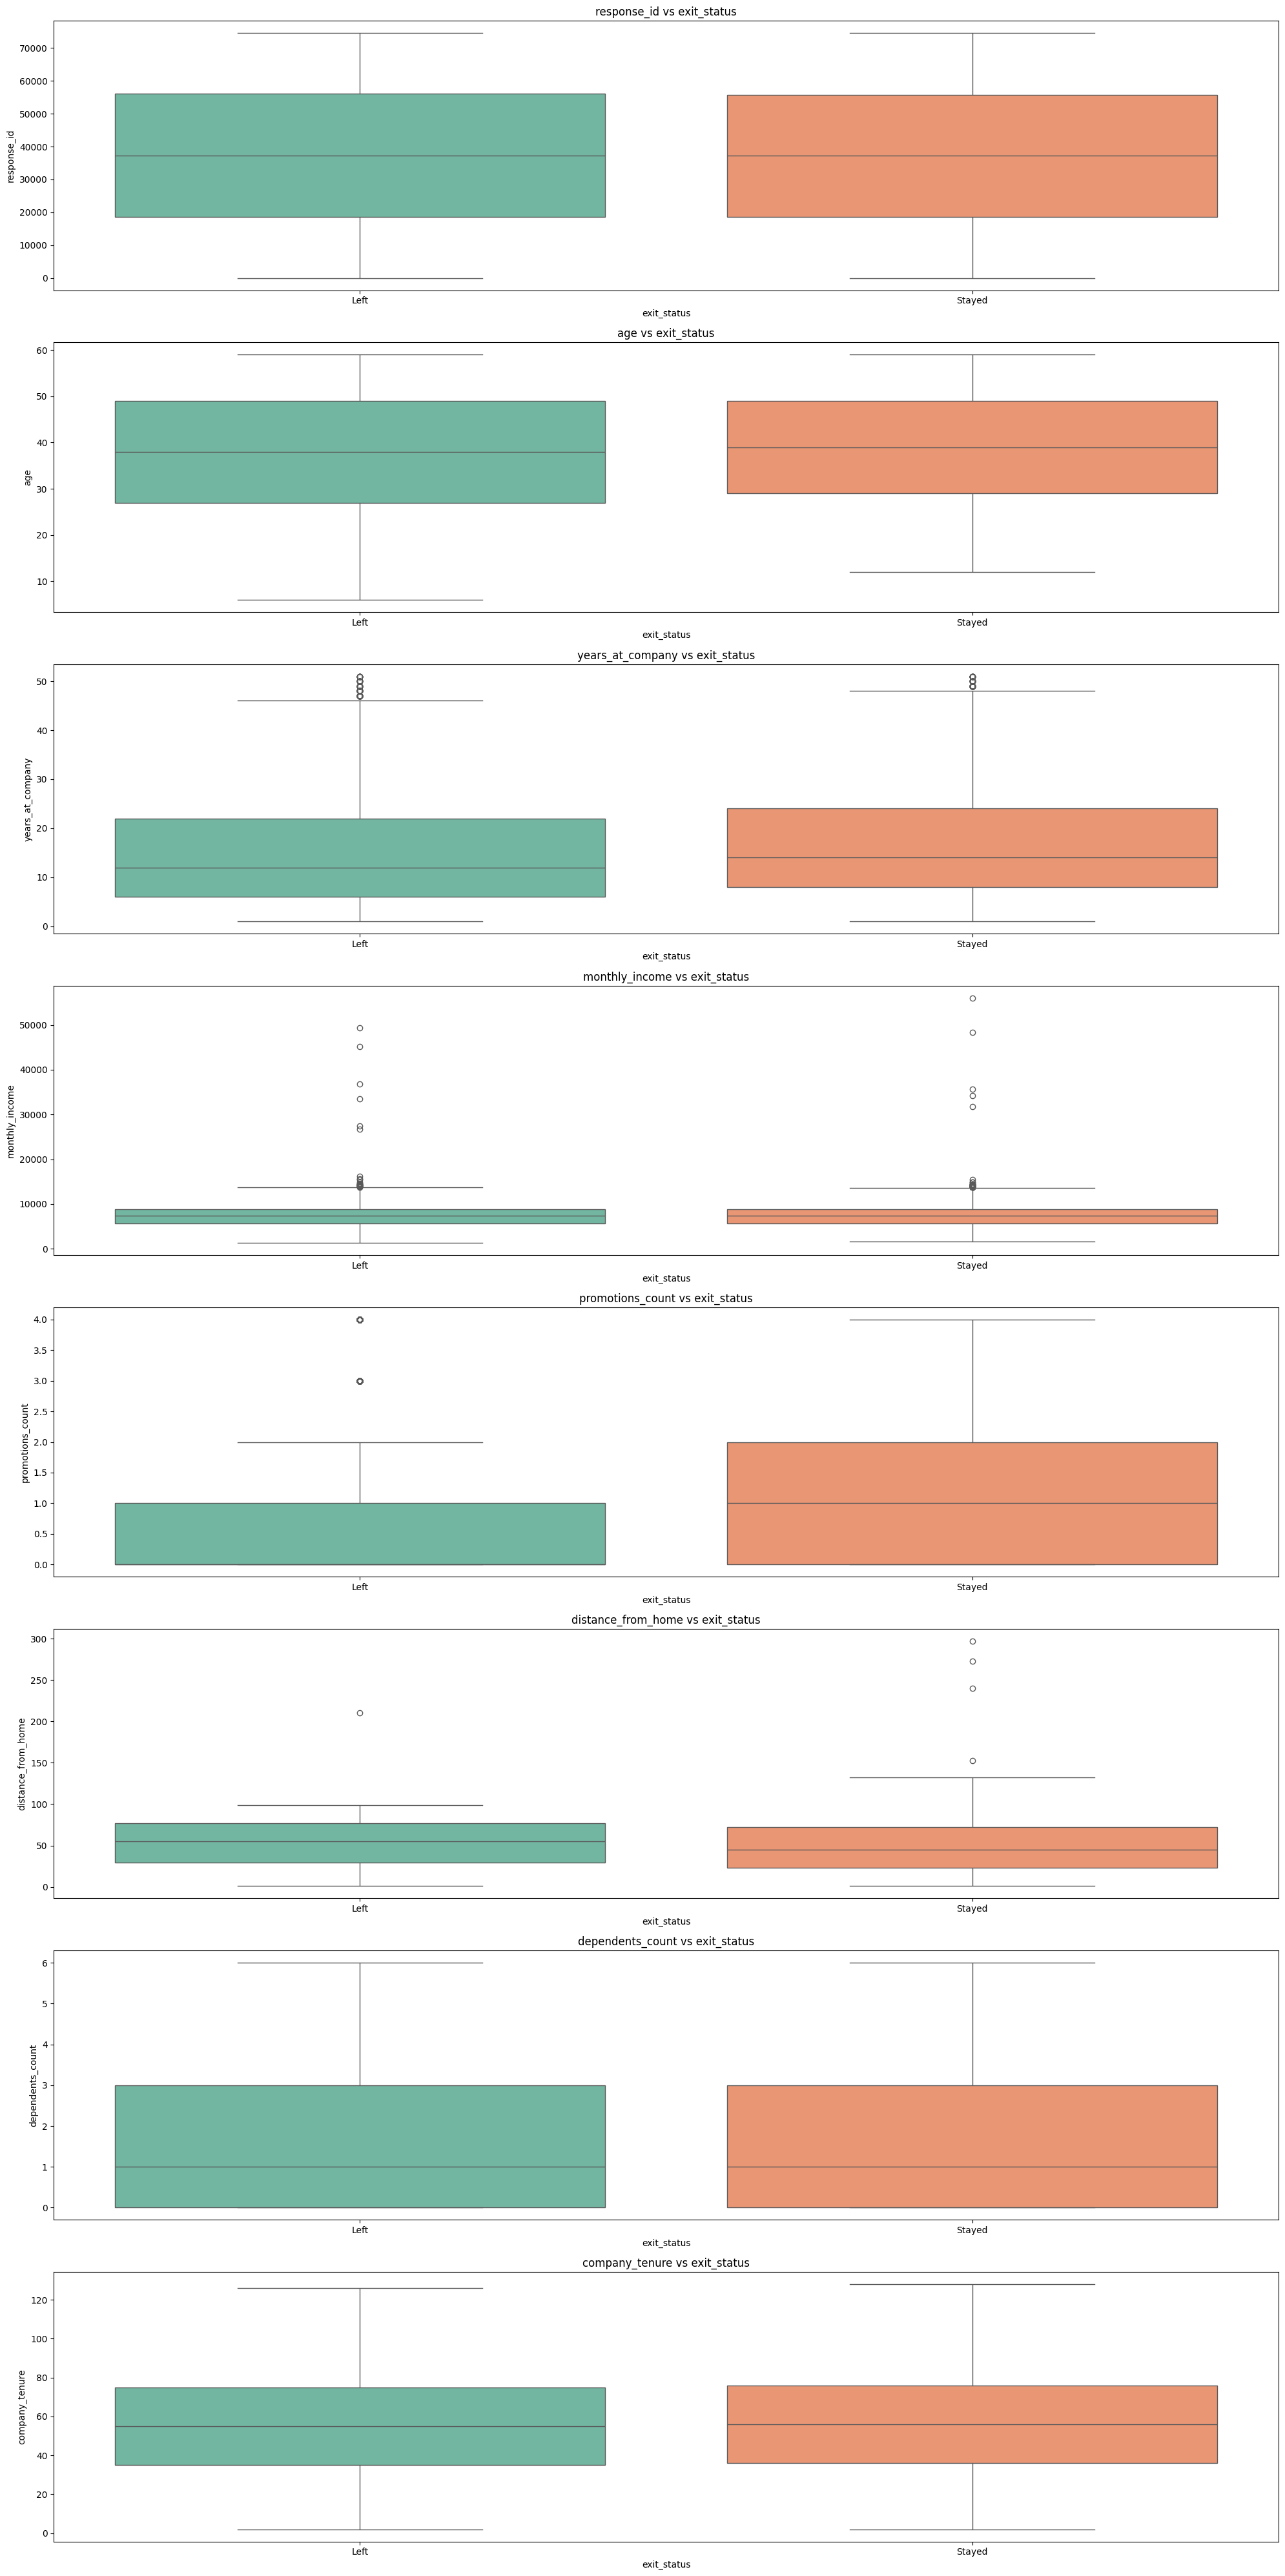

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

# Identify numerical columns and the target column
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_column = 'exit_status'  # Replace with your categorical target column

# Ensure the target column is categorical
data[target_column] = data[target_column].astype('category')

# Plot comparisons between numerical columns and the target column
plt.figure(figsize=(20, len(numerical_columns) * 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=data, x=target_column, y=col, hue=target_column, palette='Set2', legend=False)
    plt.title(f'{col} vs {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [12]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    results[model_name] = f1
    print(f"{model_name} F1 Score: {f1:.4f}")

# Select best model
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name}")


Logistic Regression F1 Score: 0.7289
SVM F1 Score: 0.7282
Neural Network F1 Score: 0.7002
Best Model: Logistic Regression


In [13]:
# Prepare test dataset for prediction
X_test = test_df.drop(columns=['response_id'])
response_ids = test_df['response_id']

# Train the best model on full data
best_model = models[best_model_name]
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', best_model)])
final_pipeline.fit(X, y)

# Make predictions
test_preds = final_pipeline.predict(X_test)
test_preds = np.where(test_preds == 1, 'Left', 'Stayed')

# Create submission file
submission = pd.DataFrame({
    'response_id': response_ids,
    'exit_status': test_preds
})
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' has been created.")


Submission file 'submission.csv' has been created.
